## Important liprary imports

In [ ]:
# Importing library
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

## Loading the labels data into dataframe and viewing the data.

In [ ]:
files.upload()

Saving labels.csv to labels (11).csv


{'labels (11).csv': b'id,breed\n000bec180eb18c7604dcecc8fe0dba07,boston_bull\n001513dfcb2ffafc82cccf4d8bbaba97,dingo\n001cdf01b096e06d78e9e5112d419397,pekinese\n00214f311d5d2247d5dfe4fe24b2303d,bluetick\n0021f9ceb3235effd7fcde7f7538ed62,golden_retriever\n002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier\n00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier\n002a283a315af96eaea0e28e7163b21b,borzoi\n003df8b8a8b05244b1d920bb6cf451f9,basenji\n0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound\n004396df1acd0f1247b740ca2b14616e,shetland_sheepdog\n0067dc3eab0b3c3ef0439477624d85d6,walker_hound\n00693b8bc2470375cc744a6391d397ec,maltese_dog\n006cc3ddb9dc1bd827479569fcdc52dc,bluetick\n0075dc49dab4024d12fafe67074d8a81,norfolk_terrier\n00792e341f3c6eb33663e415d0715370,african_hunting_dog\n007b5a16db9d9ff9d7ad39982703e429,wire-haired_fox_terrier\n007b8a07882822475a4ce6581e70b1f8,redbone\n007ff9a78eba2aebb558afea3a51c469,lakeland_terrier\n008887054b18ba3c7601792b6a453cc3,boxer\n008b1271ed1addaccf93

In [ ]:
# Read the labels.csv file and check shape and records
labels_all = pd.read_csv('labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# Loading number or each breed
breed_all = labels_all['breed']
breed_count = breed_all.value_counts()
breed_count.head()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: count, dtype: int64

In [ ]:
# Selecting all breeds because i have high computation power
CLASS_NAME = ['scottish_deerhound', 'maltese_dog', 'afghan_hound', 'entlebucher', 'bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAME))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,80,01ee3c7ff9bcaba9874183135877670e,entlebucher
4,88,021b5a49189665c0442c19b5b33e8cf1,entlebucher


In [ ]:
files.upload()

Saving shiba.jpg to shiba (3).jpg


{'shiba (3).jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\x18\x00\xc8\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\

In [ ]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels['breed'], classes = CLASS_NAME)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels))):
    img_path = 'shiba.jpg'  # Replace with the actual path to your image
    img = load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0

# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 588/588 [00:01<00:00, 444.66it/s]



Train Images shape:  (588, 224, 224, 3)  size: 88,510,464
One-hot encoded output shape:  (588, 5)  size: 2,940


#### Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).

In [ ]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAME), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 16)        0

After defining the network architecture we found out the total parameters as 162,619.

## After defining the network architecture we will start with splitting the test and train data then dividing train data in train and validation data.

In [ ]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
# Splitting the training data set into training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [ ]:
# Training the model
epochs = 100
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, Y_val))

Epoch 1/100
4/4 [==============================] - 79s 16s/step - loss: 5.4148 - accuracy: 0.1915 - val_loss: 5.3753 - val_accuracy: 0.2075
Epoch 2/100
4/4 [==============================] - 63s 15s/step - loss: 5.3654 - accuracy: 0.1915 - val_loss: 5.3314 - val_accuracy: 0.2075
Epoch 3/100
4/4 [==============================] - 65s 15s/step - loss: 5.3192 - accuracy: 0.1915 - val_loss: 5.2868 - val_accuracy: 0.2075
Epoch 4/100
4/4 [==============================] - 64s 16s/step - loss: 5.2740 - accuracy: 0.1915 - val_loss: 5.2415 - val_accuracy: 0.2264
Epoch 5/100
4/4 [==============================] - 64s 15s/step - loss: 5.2284 - accuracy: 0.2128 - val_loss: 5.1970 - val_accuracy: 0.2264
Epoch 6/100
4/4 [==============================] - 64s 15s/step - loss: 5.1836 - accuracy: 0.2128 - val_loss: 5.1526 - val_accuracy: 0.2264
Epoch 7/100
4/4 [==============================] - 64s 16s/step - loss: 5.1393 - accuracy: 0.2128 - val_loss: 5.1084 - val_accuracy: 0.2264
Epoch 8/100
4/4 [===

## Here we analyse how the model is learning with each epoch in terms of accuracy.

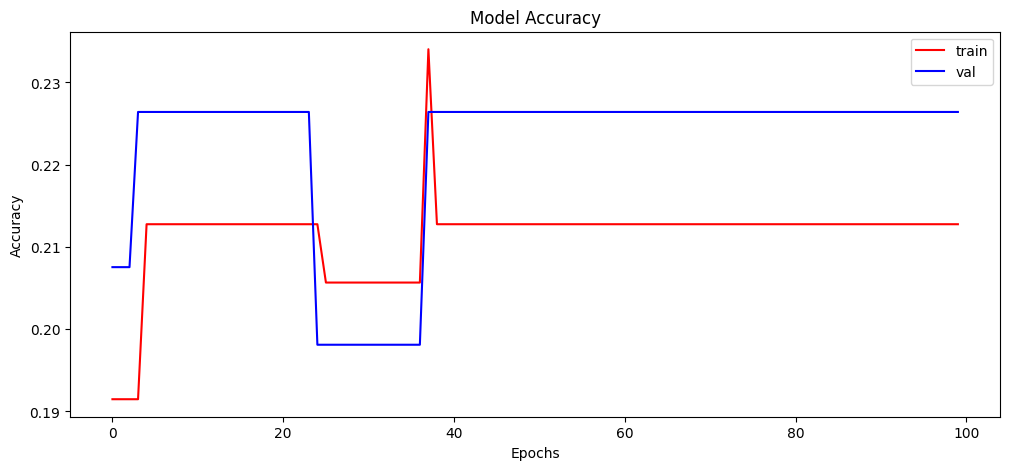

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

## We will use predict function to make predictions using this model also we are finding out the accuracy on the test set.

In [ ]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 2s 1s/step - loss: 2.6738 - accuracy: 0.2034
Accuracy over the test set: 
  20.34 %


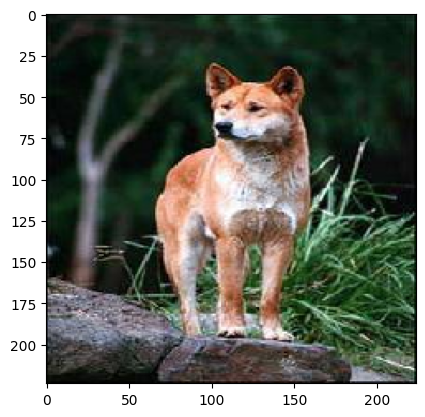

Originally :  maltese_dog
Predicted :  scottish_deerhound


In [ ]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show()

# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[1])])

# Conclusion

We started with downloading the dataset creating the model and finding out the predictions using the model. We can optimize different hyper parameters in order to tune this model for a higher accuracy. This model can be used to predict different breeds of dogs which can be further used by different NGO's working on saving animals and for educational purposes also.